## Transformer Experiments

In [101]:
from tsai.all import *
from fastcore import foundation
import numpy as np
from data import *

In [102]:
_, dataset = get_dataset_confirmed()

In [104]:
# Data converting
training_set = dataset.get_training_set()
testing_set = dataset.get_test_set()
X = []
y = []
for sample in training_set:
    X.append(sample[0][0].transpose())
    y.append(sample[1][0])
for sample in testing_set:
    X.append(sample[0][0].transpose())
    y.append(sample[1][0])
n_train, n_test = len(training_set), len(testing_set)
X = np.array(X)
y = np.array(y)
splits = (foundation.L(range(393)), foundation.L(range(393, 406)))

X      - shape: [406 samples x 7 features x 14 timesteps]  type: ndarray  dtype:float64  isnan: 0
y      - shape: (406, 1)  type: ndarray  dtype:float64  isnan: 0
splits - n_splits: 2 shape: [393, 13]  overlap: [False]


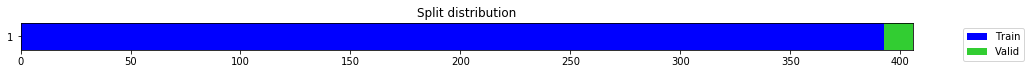

In [105]:
check_data(X, y, splits)

In [111]:
tfms  = [None, [TSRegression()]]
batch_tfms = TSStandardize(by_sample=True, by_var=True)
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=128)
# dls.one_batch()

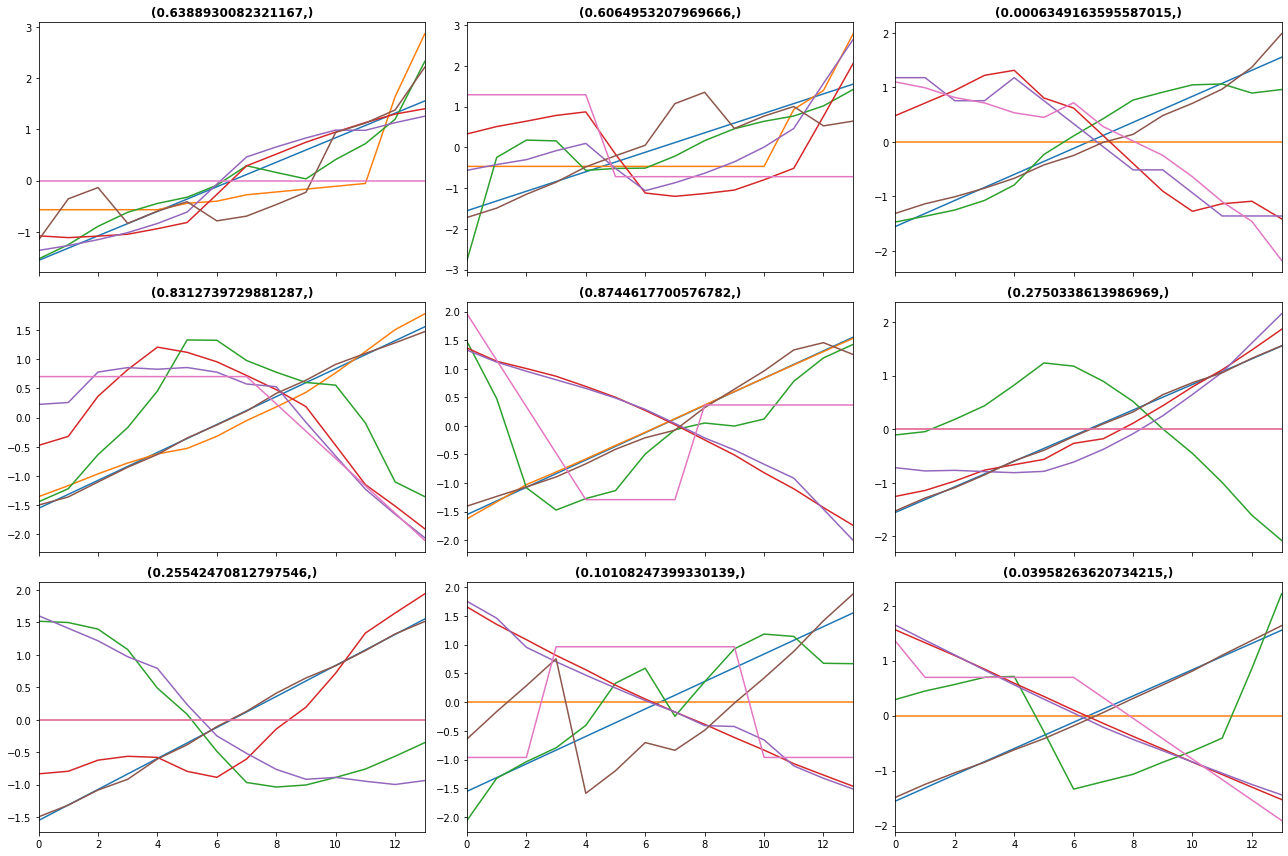

In [107]:
dls.show_batch()

## Build Learner

In [112]:
 learn = ts_learner(dls, InceptionTime, metrics=[mse], cbs=ShowGraph())

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=7.585775892948732e-05)

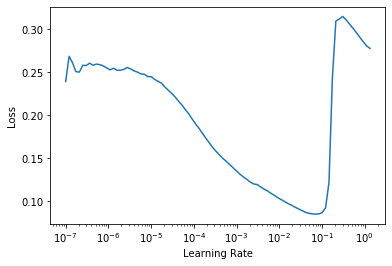

In [113]:
learn.lr_find()

epoch,train_loss,valid_loss,mse,time
0,0.139102,0.963602,0.963602,00:00
1,0.078462,0.890502,0.890502,00:00
2,0.060260,0.837532,0.837532,00:00
3,0.048656,0.799935,0.799935,00:00
4,0.041182,0.763177,0.763177,00:00
5,0.035188,0.661550,0.661550,00:00
6,0.030825,0.568063,0.568063,00:00
7,0.028575,0.476264,0.476264,00:00
8,0.026017,0.358916,0.358916,00:00
9,0.023977,0.256301,0.256301,00:00


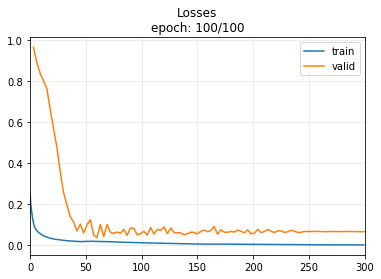

In [114]:
learn.fit_one_cycle(400, 0.0069)

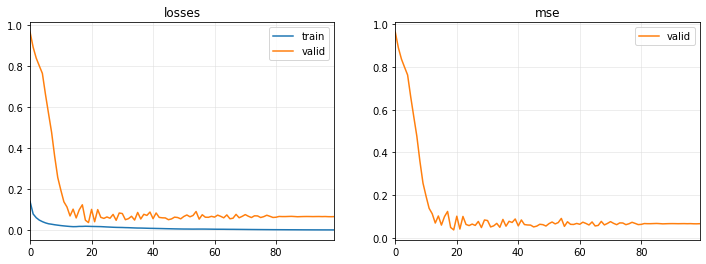

In [116]:
learn.plot_metrics()

In [121]:
dataset.y_test.values.reshape(-1)

array([0.95897125, 0.96214127, 0.96533699, 0.96861032, 0.97187428,
       0.97526333, 0.9786836 , 0.98213219, 0.98563122, 0.98918309,
       0.99272544, 0.99632824, 1.        ])